# Importing Libraries

We'll be using __[spaCy](https://spacy.io/)__ for text processing and the named Natural Language Processing (NLP) recognition, __[NetworkX](https://networkx.org/documentation/stable/index.html#)__ for analyzing the network and __[pyvis](https://pyvis.readthedocs.io/en/latest/)__ for network graph visualization.<br>
spaCy is a free open sourced library used for NLP. Another widely used library is __[Natural Language Toolkit (NLTK)](https://www.nltk.org/)__, which is more research focused, and it provides a lot of different algorithms, however spaCy uses mostly the best and the latest algorithms, so it often results in better performance.

In [101]:
import pandas as pd
import numpy as np
import spacy

# displacy module will be used to visualize some entities later.
from spacy import displacy
import networkx as nx

# For changing some plot settings later
import matplotlib.pyplot as plt

In [102]:
""" Importing the english language model for spaCy """
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [103]:
# Loading the spaCy English language model
NER = spacy.load('en_core_web_sm')

# Stratergy

There are several methods for extracting relationships from texts: from simple Rule-Based methods to advanced Deep Learning models. Deep Learning models, that are currently available, are often trained on a specific dataset, for eg: research papers on drug discoveries, so they're not really suitable for a fantasy novel. We're going to go for a simple baseline model that is based on Named Entity Recognition (click __[here](https://www.geeksforgeeks.org/named-entity-recognition/)__ for more info), together with some custom rules as follows:
1. First, we'll tokenize every book into a list of sentences and then label each sentence by the name of its character(s) appearing in the sentence.
![[Geralt, Nenneke] (1).png](attachment:a4c719e5-21e6-4916-b080-d271bd57bcdd.png)
2. Second, we'll define a window size of how far 2 sentences are apart from each other and assume that if 2 characters are mentioned in 2 sentences, within this window, then there is a relationship between them, with Named Entity Recognition. 
![[Geralt, Nenneke] (2).png](attachment:25530584-cf60-47a6-adbb-ff5c9a6f5894.png) <br>

Of course we'll recognize all kinds of entities from text: from a person's name to organization's name to location and so on. And the good thing is, we already know the names of all the characters from the books since we scraped them from the witcher wiki website using Selenium. So we can easily, automatically, filter out all the entitites that are not characters, such as names of the monsters or a kingdom.
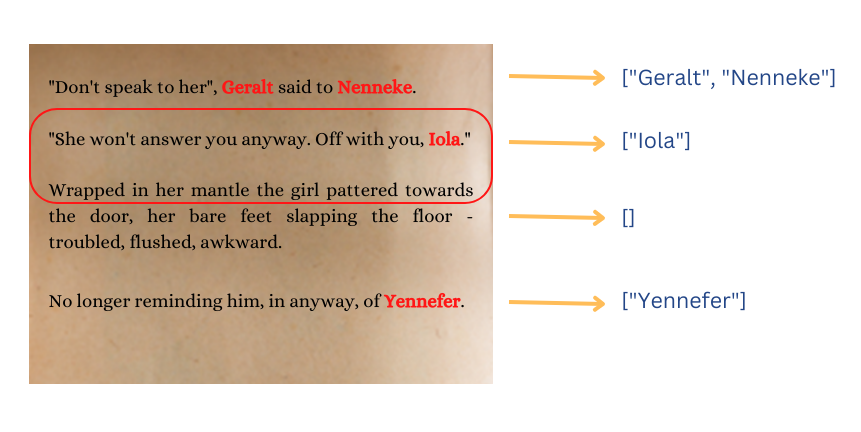
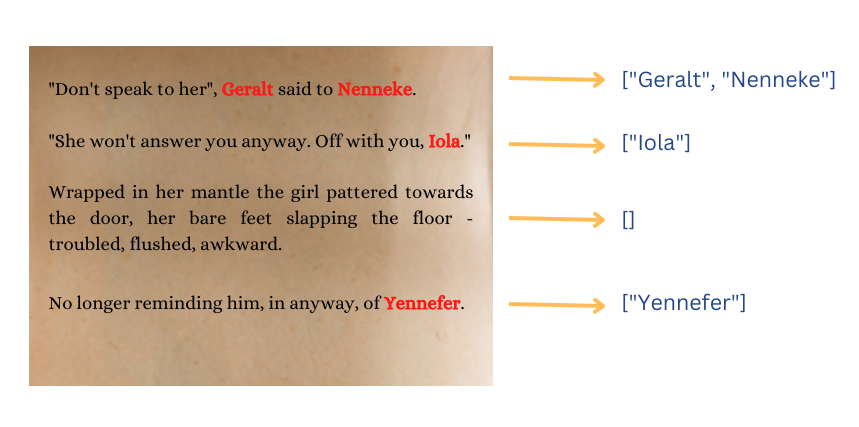

# Loading Books

In [104]:
import os

# Get all book files in the data directory.
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

# Picking the 1st book and doing analysis on it

In [105]:
book = all_books[1]

# Open and read the text found in this book.
book_text = open(book).read()

# Calling the Named Entity Recognition object.
book_doc = NER(book_text)

In [106]:
""" Visualizing the identified entities with displacy. 
    Doing this for the first 2000 characters of the book, since the book is very long. """
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

# Loading Characters Names

In [107]:
# Read characters.
character_df = pd.read_csv('characters.csv')
character_df

Unnamed: 0                                               book  \
0              0                Category:Baptism of Fire characters   
1              1                Category:Baptism of Fire characters   
2              2                Category:Baptism of Fire characters   
3              3                Category:Baptism of Fire characters   
4              4                Category:Baptism of Fire characters   
5              5                Category:Baptism of Fire characters   
6              6                Category:Baptism of Fire characters   
7              7                Category:Baptism of Fire characters   
8              8                Category:Baptism of Fire characters   
9              9                Category:Baptism of Fire characters   
10            10                Category:Baptism of Fire characters   
11            11                Category:Baptism of Fire characters   
12            12                Category:Baptism of Fire characters   
13            13                Category:Baptism of Fire characters   
14            14                Category:Baptism of Fire characters   
15            15                Category:Baptism of Fire characters   
16            16                Category:Baptism of Fire characters   
17            17                Category:Baptism of Fire characters   
18            18                Category:Baptism of Fire characters   
19            19                Category:Baptism of Fire characters   
20            20                Category:Baptism of Fire characters   
21            21                Category:Baptism of Fire characters   
22            22                Category:Baptism of Fire characters   
23            23                Category:Baptism of Fire characters   
24            24                Category:Baptism of Fire characters   
25            25                Category:Baptism of Fire characters   
26            26                Category:Baptism of Fire characters   
27            27                Category:Baptism of Fire characters   
28            28                Category:Baptism of Fire characters   
29            29                Category:Baptism of Fire characters   
30            30                Category:Baptism of Fire characters   
31            31                Category:Baptism of Fire characters   
32            32                Category:Baptism of Fire characters   
33            33                Category:Baptism of Fire characters   
34            34                Category:Baptism of Fire characters   
35            35                Category:Baptism of Fire characters   
36            36                Category:Baptism of Fire characters   
37            37                Category:Baptism of Fire characters   
38            38                Category:Baptism of Fire characters   
39            39                Category:Baptism of Fire characters   
40            40                Category:Baptism of Fire characters   
41            41                Category:Baptism of Fire characters   
42            42                Category:Baptism of Fire characters   
43            43                Category:Baptism of Fire characters   
44            44                Category:Baptism of Fire characters   
45            45                Category:Baptism of Fire characters   
46            46                Category:Baptism of Fire characters   
47            47                Category:Baptism of Fire characters   
48            48                Category:Baptism of Fire characters   
49            49                Category:Baptism of Fire characters   
50            50                Category:Baptism of Fire characters   
51            51                Category:Baptism of Fire characters   
52            52                Category:Baptism of Fire characters   
53            53                Category:Baptism of Fire characters   
54            54                Category:Baptism of Fire characters   
55            55              

In [108]:
character_df.iloc[13, 2]

'Aubry (first born)'

In [109]:
character_df.iloc[27, 2]

'Cirilla Fiona (imposter)'

In [110]:
character_df.iloc[51, 2]

'Falka (alias)'

In [111]:
character_df.iloc[59, 2]

'Geralt of Rivia'

As we can see, there are some names in the characters dataset that have additional info in the brackets. We don't want them in our character names because later we will have to match those names with the names that are actually appearing in the books. So we're gonna remove the brackets and the text between them. <br>

We'll import the __[regular expression](https://docs.python.org/3/library/re.html)__ module and we'll do an __[apply](https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/)__ function on the 'character' column of our dataset. For each row in this column, we will substitute the pattern in the parenthesis of the first arguement with an empty string and if the pattern is not found, we'll simply return to the original value.

`character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))` <br>

We'll also create a column for the first names of the characters, because sometimes in a text, a character might be mentioned only by the first name. For eg: Geralt of Rivia, the hero in the series, is only mentioned as Geralt in the books. So we will do an __[apply](https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/)__ function on the character column, and we will use a lambda function to split the string into different words, and then we'll only take the first word, which is the first name of the characters.

`character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])`

In [112]:
# Remove brackets and text between them.
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [113]:
# Checking the character_df to make sure everything works
pd.set_option('display.max_rows', None)
character_df

Unnamed: 0                                               book  \
0              0                Category:Baptism of Fire characters   
1              1                Category:Baptism of Fire characters   
2              2                Category:Baptism of Fire characters   
3              3                Category:Baptism of Fire characters   
4              4                Category:Baptism of Fire characters   
5              5                Category:Baptism of Fire characters   
6              6                Category:Baptism of Fire characters   
7              7                Category:Baptism of Fire characters   
8              8                Category:Baptism of Fire characters   
9              9                Category:Baptism of Fire characters   
10            10                Category:Baptism of Fire characters   
11            11                Category:Baptism of Fire characters   
12            12                Category:Baptism of Fire characters   
13            13                Category:Baptism of Fire characters   
14            14                Category:Baptism of Fire characters   
15            15                Category:Baptism of Fire characters   
16            16                Category:Baptism of Fire characters   
17            17                Category:Baptism of Fire characters   
18            18                Category:Baptism of Fire characters   
19            19                Category:Baptism of Fire characters   
20            20                Category:Baptism of Fire characters   
21            21                Category:Baptism of Fire characters   
22            22                Category:Baptism of Fire characters   
23            23                Category:Baptism of Fire characters   
24            24                Category:Baptism of Fire characters   
25            25                Category:Baptism of Fire characters   
26            26                Category:Baptism of Fire characters   
27            27                Category:Baptism of Fire characters   
28            28                Category:Baptism of Fire characters   
29            29                Category:Baptism of Fire characters   
30            30                Category:Baptism of Fire characters   
31            31                Category:Baptism of Fire characters   
32            32                Category:Baptism of Fire characters   
33            33                Category:Baptism of Fire characters   
34            34                Category:Baptism of Fire characters   
35            35                Category:Baptism of Fire characters   
36            36                Category:Baptism of Fire characters   
37            37                Category:Baptism of Fire characters   
38            38                Category:Baptism of Fire characters   
39            39                Category:Baptism of Fire characters   
40            40                Category:Baptism of Fire characters   
41            41                Category:Baptism of Fire characters   
42            42                Category:Baptism of Fire characters   
43            43                Category:Baptism of Fire characters   
44            44                Category:Baptism of Fire characters   
45            45                Category:Baptism of Fire characters   
46            46                Category:Baptism of Fire characters   
47            47                Category:Baptism of Fire characters   
48            48                Category:Baptism of Fire characters   
49            49                Category:Baptism of Fire characters   
50            50                Category:Baptism of Fire characters   
51            51                Category:Baptism of Fire characters   
52            52                Category:Baptism of Fire characters   
53            53                Category:Baptism of Fire characters   
54            54                Category:Baptism of Fire characters   
55            55              

# Get named entity list per sentence

We'll now go through the book sentence by sentence and create a list of entity for those sentences. <br>

For each sentence, we will create an entity list that willl store the entity for all the entities that are in the sentences. spaCy has done all of this for us, so we are basically doing some book keeping. Then we will append the sentence together with its entity list into _sent_entity_df_ which we will then convert to a Pandas DataFrame. <br>

Here are some refrences: __[What's an entity?](https://www.geeksforgeeks.org/named-entity-recognition/)__, __[Entity annotations](https://notebook.community/rishuatgithub/MLPy/nlp/UPDATED_NLP_COURSE/02-Parts-of-Speech-Tagging/02-NER-Named-Entity-Recognition)__.

In [114]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [115]:
sent_entity_df

sentence  \
0      (ï»¿The, Limits, of, the, Possible, \n, I, \n,...   
1      (", It, 's, been, an, hour, and, a, quarter, s...   
2                                 (He, 's, done, for, .)   
3      (", \n, The, townsfolk, ,, huddled, together, ...   
4      (A, fat, man, dressed, in, a, yellow, smock, \...   
5      (", We, have, to, wait, a, bit, longer, ,, ", ...   
6      (", Why, wait, ?, ", snorted, pimply, ,, ", Th...   
7      (Anyone, goes, down, there, ,, that, 's, the, ...   
8      (Have, you, forgotten, how, many, \n, have, di...   
9      (What, are, we, waiting, for, ?, ", \n, ", Thi...   
10         (murmured, the, fat, man, uncertainly, ., \n)   
11     (", An, agreement, you, made, with, a, living,...   
12     (", He, is, now, dead, ,, as, surely, as, the,...   
13     (It, was, plain, from, the, beginning, that, h...   
14     (He, did, n't, even, take, a, mirror, with, hi...   
15     (", \n, ", At, least, we, 've, saved, some, co...   
16                   (You, might, as, well, go, home, .)   
17     (As, far, as, the, sorcerer, 's, horse, and, b...   
18     (well, it, \n, would, be, a, shame, if, they, ...   
19     (", \n, ", Yes, ,, ", said, the, butcher, ,, "...   
20                           (Let, 's, take, a, look, .)   
21     (", \n, ", What, are, you, doing, ?, ", \n, ",...   
22     (Do, n't, get, in, the, way, unless, you, want...   
23     (", A, fine, old, mare, ,, ", repeated, the, b...   
24      (", Leave, the, horse, alone, ,, my, darling, .)   
25     (", \n, The, butcher, slowly, turned, around, ...   
26     (The, stranger, had, thick, curly, brown, hair...   
27                         (He, had, no, weapons, ., \n)   
28     (3, \n, ", Step, away, from, the, horse, ,, ",...   
29                          (", What, have, we, here, ?)   
30     (A, horse, and, saddlebags, belonging, to, ano...   
31     (Is, that, honourable, ?, ", \n, Pimply, slowl...   
32     (The, butcher, gave, a, nod, and, signalled, t...   
33     (Both, carried, heavy, clubs, ,, like, those, ...   
34     (", Who, are, you, ?, ", demanded, the, pimply...   
35                (", \n, ", You, carry, no, weapons, .)   
36     (", \n, ", That, 's, true, ,, ", the, stranger...   
37     (", \n, ", That, 's, no, good, ,, ", pimply, d...   
38     (", \n, The, butcher, also, drew, a, blade, ;,...   
39     (The, other, two, men, approached, ,, brandish...   
40     (", I, do, n't, carry, weapons, ,, ", responde...   
41     (", \n, From, behind, the, ruins, ,, two, youn...   
42     (The, crowd, quickly, parted, ,, retreated, th...   
43     (The, girls, smiled, ,, flashing, their, teeth...   
44     (They, had, blue, stripes, tattooed, from, the...   
45     (Lynx, pelt, clad, their, strong, muscles, fro...   
46     (From, behind, the, mail, -, clad, shoulder, o...   
47     (Pimply, got, down, on, one, knee, and, slowly...   
48     (From, the, hole, in, ruins, came, a, rumble, ...   
49     (Following, the, hands, ,, a, white, head, app...   
50               (A, murmur, escaped, the, crowd, ., \n)   
51     (The, alabaster, -, haired, man, straightened,...   
52     (Holding, the, beast, by, its, long, lizard, -...   
53     (The, burgrave, jumped, backwards, and, trippe...   
54     (Its, slashed, throat, ,, once, carmine, ,, wa...   
55              (Its, sunken, eyes, were, glassy, ., \n)   
56     (", Here, 's, the, basilisk, ,, ", said, the, ...   
57     (I, will, check, them, ,, I, 'm, warning, you, .)   
58     (", \n, 4, \n, With, shaking, hands, ,, the, b...   
59     (The, white, -, haired, man, looked, around, a...   
60     (He, also, noticed, the, man, in, the, brown, ...   
61     (", It, 's, always, the, same, ,, ", he, said,...   
62     (You, people, never, change, ,, damn, you, to,...   
63     (", \n, ", We, have, n't, touched, your, bags,...   
64     (The, men, armed, with, the, clubs, had, long,...   
65     (", Your, things, have, not, been, disturbed, ...   
66     (At, the, sight, of, 

# Function to filter out all the entities that are not characters

In [116]:
def filter_entity(ent_list, character_df):
    """ Returns a list of entities, 
        only if an entity belongs to the character column of character_df,
        or if it belongs to the character_firstname column of character_df."""
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.character_firstname)]

In [117]:
# Output shows that only the character names are kept in the list.
filter_entity(["Geralt", "Python", "2"], character_df)

['Geralt']

In [118]:
# Applying the above function
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df)) 

# Filtering out sentences that don't have any named entities (empty entities).
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
85                       (I, am, Geralt, of, Rivia, .)   
95   (Is, there, anything, keeping, you, in, this, ...   
102  (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
106  (", \n, ", There, are, some, ,, ", Geralt, rep...   
110  (", \n, Geralt, took, off, a, glove, and, shoo...   
140  (", I, forgot, ,, ", Three, Jackdaws, winked, ...   
151  (Geralt, loosened, his, belt, ,, removed, his,...   
157  (", Do, the, girls, speak, the, common, langua...   
160  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...   
169  (Yet, there, is, a, certain, principal, underl...   

                     entities character_entities  
85          [Geralt of Rivia]  [Geralt of Rivia]  
95          [Geralt of Rivia]  [Geralt of Rivia]  
102           [Borch, Geralt]           [Geralt]  
106                  [Geralt]           [Geralt]  
110                  [Geralt]           [Geralt]  
140  [Three Jackdaws, Geralt]           [Geralt]  
151                  [Geralt]           [Geralt]  
157                  [Geralt]           [Geralt]  
160             [Geralt, Hmm]           [Geralt]  
169                  [Geralt]           [Geralt]

So far so good. We can see that Geralt of Rivia and Geralt are identified as 2 different entities, which is not good, because later in our analysis we don't want to create 2 different characters for the same character. So we will only take the first name of the character, just to be consistent.

In [119]:
# Take only the first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\sonakshi\AppData\Local\Temp\ipykernel_5024\731142358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [120]:
# Resetting options to their default value.
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
85                         (I, am, Geralt, of, Rivia, .)   
95     (Is, there, anything, keeping, you, in, this, ...   
102    (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
106    (", \n, ", There, are, some, ,, ", Geralt, rep...   
110    (", \n, Geralt, took, off, a, glove, and, shoo...   
...                                                  ...   
11314  (He, only, saw, black, -, gloved, hands, squee...   
11316                                 (Oh, ,, Geralt, !)   
11321                            (Say, it, ,, Geralt, !)   
11322  (Forever, !, Say, it, !, ", \n, ", Forever, ,,...   
11327  (", \n, Yurga, saw, astonishment, in, the, eye...   

                      entities character_entities  
85           [Geralt of Rivia]           [Geralt]  
95           [Geralt of Rivia]           [Geralt]  
102            [Borch, Geralt]           [Geralt]  
106                   [Geralt]           [Geralt]  
110                   [Geralt]           [Geralt]  
...                        ...                ...  
11314                   [Ciri]             [Ciri]  
11316                 [Geralt]           [Geralt]  
11321                 [Geralt]           [Geralt]  
11322  [Forever, Ciri, Geralt]     [Ciri, Geralt]  
11327                  [Yurga]            [Yurga]  

[1696 rows x 3 columns]

# Creating Relationships

As discussed earlier, we will now specify a __window size__. Right now, we'll use a window size of 5 sentences. We'll basically do a rolling window through the text and identify all the characters that appear in the same window of 5 sentences. <br>

So, for _i_ in range of the last index of the _sent_entity_df_filtered_, we'll create an _end_i_. So the end index of the window will be _i + 5_. But we have to be a bit careful here, because once we get to the last few rows of the DataFrame, if we take _i + 5_, then we're basically exceeding the maximum row in the DataFrame (that is, _i + 5_ does not exist). So to counter that, we'll take the minimum of _i + 5_ and the last row of the DataFrame.

`end_i = min(i + 5, sent_entity_df_filtered.index[-1])`

Then we'll __store all the entities that appear in these 5 rows into a list__. A trick for doing this to call a sum function and to merge this list with an empty list.

`char_list = sum((sent_entity_df_filtered.loc[i:end_i].character_entities, []))`

You can check out a few examples by running the following command after the above command:

`if i > 200 and i < 300:` <br>
`       print(char_list)`
        
We can see here that there are quite some duplicating characters in the windows (for eg: _['Geralt', 'Geralt']_), and we are not interested in analyzing one's relationship with itself, so we can just __remove those duplicated characters__ that are next to each other.

`char_unique = [char_list[i] for i in range(len(char_list)) if (i==0) or char_list[i] != char_list[i-1]]`

Now, we'll __define relationships__ between characters that are in the window. Basically, we'll go through the list and create an edge for all the characters that appear next to each other.

![[Geralt, Nenneke] (3).png](attachment:a0e23733-0171-412c-ac19-4582b26fe5d5.png) <br>

For this, we'll initialize an empty list and loop through all the unique characters that appear in the window. Then we will create unique relationships between the 2 characters that are appearing next to each other: so we will take the 1st character as the source and the 2nd character as the target, this way, we will define a network.<br> 
And let's only do this if the length of the character unique list is > 1, because if there's only one character then there's no relationship. <br>
We will iterate only until the 2nd last character of this list, because if we increment the last index by 1, we'll be exceeding the maximum index of the list.
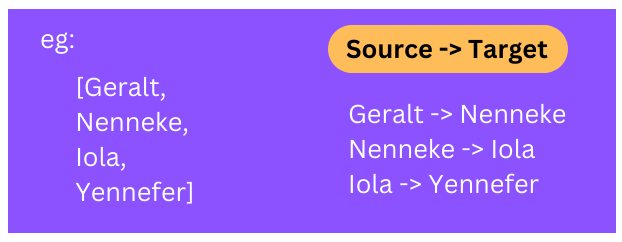

In [121]:
window_size = 5
relationships =[]

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
        
    # Remove duplicated characters that are next to each other.
    char_unique = [char_list[i] for i in range(len(char_list)) if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [122]:
relationships_df = pd.DataFrame(relationships)

In [123]:
pd.set_option('display.max_rows', None)
relationships_df

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3              Niedamir             Geralt
4              Niedamir             Geralt
5              Niedamir             Geralt
6                Geralt           Niedamir
7                Geralt           Niedamir
8              Niedamir             Geralt
9              Niedamir             Geralt
10             Niedamir             Geralt
11             Niedamir             Geralt
12               Geralt               Eyck
13               Geralt               Eyck
14               Geralt               Eyck
15                 Eyck             Geralt
16                 Eyck             Geralt
17                 Eyck             Geralt
18                 Eyck             Geralt
19               Geralt               Eyck
20                 Eyck             Geralt
21               Geralt               Eyck
22               Geralt               Eyck
23             Niedamir             Geralt
24             Niedamir             Geralt
25             Niedamir             Geralt
26             Niedamir             Geralt
27             Niedamir             Geralt
28               Geralt         Dorregaray
29               Geralt         Dorregaray
30           Dorregaray           Yennefer
31             Yennefer         Dorregaray
32             Yennefer         Dorregaray
33             Yennefer         Dorregaray
34             Yennefer         Dorregaray
35             Yennefer         Dorregaray
36           Dorregaray             Geralt
37             Yennefer         Dorregaray
38           Dorregaray             Geralt
39               Geralt             Yarpen
40               Geralt             Yarpen
41               Geralt             Yarpen
42         Gyllenstiern             Geralt
43         Gyllenstiern             Geralt
44         Gyllenstiern             Geralt
45         Gyllenstiern             Geralt
46               Geralt           Niedamir
47         Gyllenstiern             Geralt
48               Geralt           Niedamir
49         Gyllenstiern             Geralt
50               Geralt           Niedamir
51             Niedamir             Boholt
52               Boholt             Geralt
53               Boholt             Geralt
54               Geralt             Kennet
55               Geralt             Kennet
56               Kennet             Boholt
57               Kennet             Boholt
58               Kennet             Boholt
59               Kennet             Boholt
60               Boholt             Geralt
61               Geralt             Yarpen
62               Geralt             Yarpen
63               Geralt             Yarpen
64               Geralt             Yarpen
65               Geralt             Yarpen
66               Yarpen           Yennefer
67               Yarpen           Yennefer
68               Yarpen           Yennefer
69             Yennefer           Niedamir
70             Niedamir       Gyllenstiern
71             Niedamir       Gyllenstiern
72         Gyllenstiern           Yennefer
73             Niedamir       Gyllenstiern
74         Gyllenstiern           Yennefer
75             Niedamir       Gyllenstiern
76         Gyllenstiern           Yennefer
77             Niedamir       Gyllenstiern
78         Gyllenstiern           Yennefer
79             Niedamir       Gyllenstiern
80         Gyllenstiern           Yennefer
81             Yennefer             Boholt
82             Yennefer             Boholt
83             Yennefer             Boholt
84             Yennefer             Boholt
85             Yennefer             Boholt
86             Yennefer             Boholt
87             Yennefer             Boholt
88               Boholt             Yarpen
89             Yennefer             Boholt
90               Boholt             Yarpen
91             Yennefer             Boholt
92               B

From the above output, we can see that certain characters that have relationships with each other appear many, many times. For eg: _Geralt and Niedamir_, _Niedamir and Geralt_. So, we'll aggregate all those rows together and create a __weight column__. So the weight, or value column, indicates how _strong a relationship between the two characters is_, and _how many times the relationship appears in the text_. <br>

In some cases, we have some reverse relationship between the source and target column, and they are also duplicated relationships, and we want to aggregate all of them into only one relationship. We do this by __sorting all the rows column-wise__. Then we will be able to identify all the duplicates easily.

In [124]:
# Sort the cases with a -> b and b -> a
relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis=1), columns=relationships_df.columns)
relationships_df

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3                Geralt           Niedamir
4                Geralt           Niedamir
5                Geralt           Niedamir
6                Geralt           Niedamir
7                Geralt           Niedamir
8                Geralt           Niedamir
9                Geralt           Niedamir
10               Geralt           Niedamir
11               Geralt           Niedamir
12                 Eyck             Geralt
13                 Eyck             Geralt
14                 Eyck             Geralt
15                 Eyck             Geralt
16                 Eyck             Geralt
17                 Eyck             Geralt
18                 Eyck             Geralt
19                 Eyck             Geralt
20                 Eyck             Geralt
21                 Eyck             Geralt
22                 Eyck             Geralt
23               Geralt           Niedamir
24               Geralt           Niedamir
25               Geralt           Niedamir
26               Geralt           Niedamir
27               Geralt           Niedamir
28           Dorregaray             Geralt
29           Dorregaray             Geralt
30           Dorregaray           Yennefer
31           Dorregaray           Yennefer
32           Dorregaray           Yennefer
33           Dorregaray           Yennefer
34           Dorregaray           Yennefer
35           Dorregaray           Yennefer
36           Dorregaray             Geralt
37           Dorregaray           Yennefer
38           Dorregaray             Geralt
39               Geralt             Yarpen
40               Geralt             Yarpen
41               Geralt             Yarpen
42               Geralt       Gyllenstiern
43               Geralt       Gyllenstiern
44               Geralt       Gyllenstiern
45               Geralt       Gyllenstiern
46               Geralt           Niedamir
47               Geralt       Gyllenstiern
48               Geralt           Niedamir
49               Geralt       Gyllenstiern
50               Geralt           Niedamir
51               Boholt           Niedamir
52               Boholt             Geralt
53               Boholt             Geralt
54               Geralt             Kennet
55               Geralt             Kennet
56               Boholt             Kennet
57               Boholt             Kennet
58               Boholt             Kennet
59               Boholt             Kennet
60               Boholt             Geralt
61               Geralt             Yarpen
62               Geralt             Yarpen
63               Geralt             Yarpen
64               Geralt             Yarpen
65               Geralt             Yarpen
66               Yarpen           Yennefer
67               Yarpen           Yennefer
68               Yarpen           Yennefer
69             Niedamir           Yennefer
70         Gyllenstiern           Niedamir
71         Gyllenstiern           Niedamir
72         Gyllenstiern           Yennefer
73         Gyllenstiern           Niedamir
74         Gyllenstiern           Yennefer
75         Gyllenstiern           Niedamir
76         Gyllenstiern           Yennefer
77         Gyllenstiern           Niedamir
78         Gyllenstiern           Yennefer
79         Gyllenstiern           Niedamir
80         Gyllenstiern           Yennefer
81               Boholt           Yennefer
82               Boholt           Yennefer
83               Boholt           Yennefer
84               Boholt           Yennefer
85               Boholt           Yennefer
86               Boholt           Yennefer
87               Boholt           Yennefer
88               Boholt             Yarpen
89               Boholt           Yennefer
90               Boholt             Yarpen
91               Boholt           Yennefer
92               B

For each row, we'll create a __value, or weight__, of the relationship as 1. Finally, we just need to group by the source and the target. And then, we will take the sum of all the values. In the end, we'll have a value column that indicates how many times this relationship appears in the text, according to our definition.

In [125]:
relationships_df["value"] = 1
relationships_df = relationships_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [126]:
relationships_df.head(10)

source        target  value
0      Geralt      Niedamir     52
1        Eyck        Geralt     51
2  Dorregaray        Geralt     30
3  Dorregaray      Yennefer     44
4      Geralt        Yarpen     24
5      Geralt  Gyllenstiern     32
6      Boholt      Niedamir     21
7      Boholt        Geralt     39
8      Geralt        Kennet      2
9      Boholt        Kennet      8

# Graph Analysis and Visualization

Essentially what we just created above is actually a Pandas edgelist, which is a DataFrame that contains a source and a target. <br>
Every edge in the network will have 2 components: the source node and the target node. <br>
You can read more in the __[from_pandas_edgelist](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html)__ documentation and __[nx.Graph()](https://networkx.org/documentation/stable/tutorial.html)__. 

In [127]:
# Create a graph from a Pandas DataFrame using NetworkX
G = nx.from_pandas_edgelist(relationships_df, 
                            source = "source",    # specifying the source
                            target = "target",    # and target columns
                            edge_attr = "value",  # specifies different properties of an edge. here we have only 1: value
                            create_using = nx.Graph()
                           )   

## Graph Visualization - NetworkX

There are several layouts that NetworkX provides for us to visualize a graph. For now, we'll use the __[nx.draw_kamada_kawai(G)](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_kamada_kawai.html)__ layout. <br>
We'll just define a layout as positions for the nodes, and then we'll call a __[nx.draw()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html)__ function on the graph, draws a graph G with matplotlib, with the labels as True, node color as sky blue and the position as the position that we just defined. __[edge_cmap](https://networkx.org/documentation/stable/auto_examples/drawing/plot_edge_colormap.html)__  defines a colormap for the edges. 

In [128]:
!pip3 install scipy

You should consider upgrading via the 'D:\laptop data\sonakshi\Data Science Projects\witcher\path\to\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


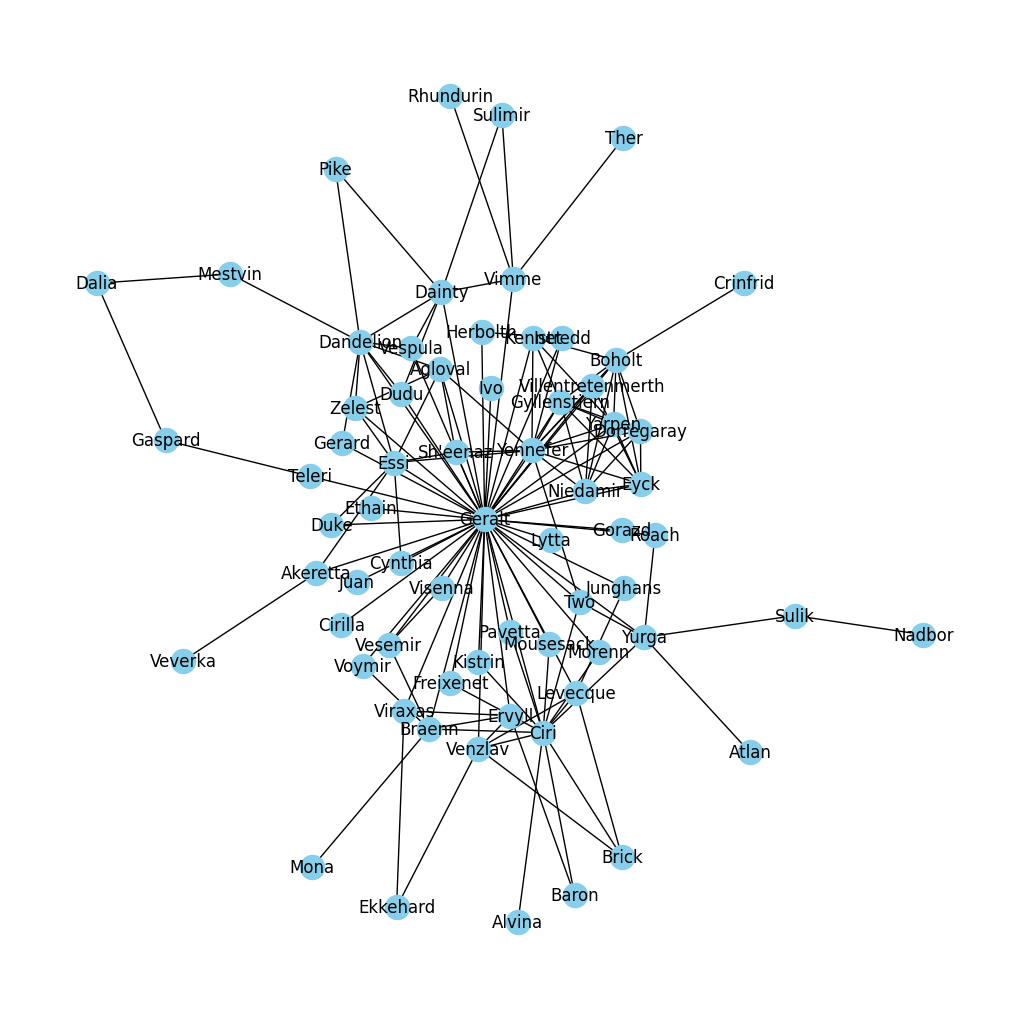

In [129]:
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

## Graph Visualization - pyvis

The Network class is the focus of pyvis library. All vizualization functionality should be implemented off of a Network instance. You can refer __[here](https://pyvis.readthedocs.io/en/latest/documentation.html)__ and __[here](https://towardsdatascience.com/pyvis-visualize-interactive-network-graphs-in-python-77e059791f01)__. <br>
To view the graph in our Jupyter Notebook, we add the parameter _notebook=True_ to Network. We set the width, height, background color and font color of our Network as well. <br>
__[net.from_nx()](https://pyvis.readthedocs.io/en/latest/documentation.html)__ takes an exisitng NetworkX graph and translates it to a pyvis graph. <br>
__[net.show()](https://pyvis.readthedocs.io/en/latest/tutorial.html)__ displays the graph after the underlying network is constructed. The interactive visualization is presented as a static HTML file. <br>

We will also customize the node size based on __the degrees of the node__. The degree of a node is defined as the number of connections this node has. For eg: if we draw a circle around the node and count the number of times the circle touches the edges around the node, then this is the degrees of the node.

![[Geralt, Nenneke] (4).png](attachment:f3ab921a-85b8-48e2-9bf8-6a4dfd786dcc.png) <br>

NetworkX has already done all of this for us, so we just need to store the degrees of the nodes in a dictionary. __[nx.set_node_attributes()](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html)__ will set the degrees of the nodes as size of the nodes on graph G.
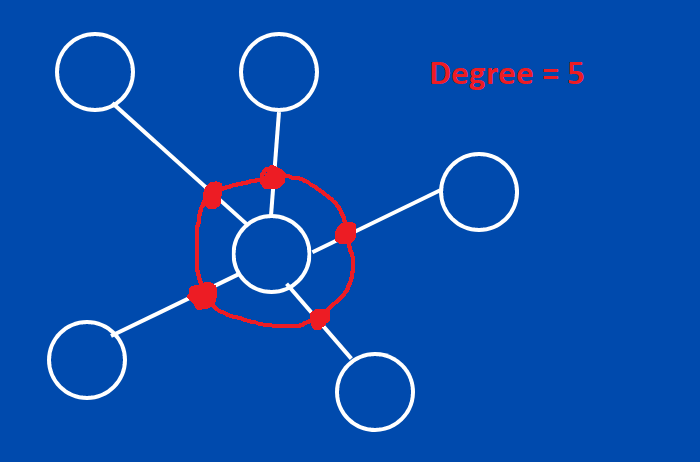

In [130]:
from pyvis.network import Network
net = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

# Storing the degrees of the nodes in a dictionary.
node_degree = dict(G.degree)

# Setting up node size attribute.
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show("witcher.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [131]:
dict(G.degree)

{'Geralt': 49,
 'Niedamir': 8,
 'Eyck': 8,
 'Dorregaray': 6,
 'Yennefer': 14,
 'Yarpen': 7,
 'Gyllenstiern': 8,
 'Boholt': 9,
 'Kennet': 5,
 'Crinfrid': 1,
 'Villentretenmerth': 4,
 'Istredd': 3,
 'Herbolth': 2,
 'Ivo': 1,
 'Two': 4,
 'Dandelion': 10,
 'Pike': 2,
 'Dainty': 7,
 'Vespula': 3,
 'Vimme': 5,
 'Sulimir': 2,
 'Ther': 1,
 'Rhundurin': 1,
 'Dudu': 3,
 "Sh'eenaz": 4,
 'Agloval': 6,
 'Gaspard': 2,
 'Teleri': 2,
 'Dalia': 2,
 'Mestvin': 2,
 'Essi': 9,
 'Gerard': 2,
 'Zelest': 4,
 'Duke': 2,
 'Akeretta': 3,
 'Veverka': 1,
 'Ethain': 1,
 'Juan': 1,
 'Cynthia': 2,
 'Braenn': 6,
 'Ciri': 14,
 'Ervyll': 5,
 'Voymir': 2,
 'Kistrin': 2,
 'Alvina': 1,
 'Vesemir': 3,
 'Cirilla': 1,
 'Freixenet': 2,
 'Venzlav': 6,
 'Ekkehard': 2,
 'Viraxas': 3,
 'Morenn': 2,
 'Mona': 1,
 'Pavetta': 2,
 'Baron': 2,
 'Junghans': 2,
 'Brick': 3,
 'Levecque': 5,
 'Mousesack': 2,
 'Yurga': 6,
 'Visenna': 2,
 'Atlan': 1,
 'Lytta': 1,
 'Gorazd': 1,
 'Roach': 2,
 'Nadbor': 1,
 'Sulik': 2}

# Centrality Measure

We just touched the topic of __Degrees of Centrality__, which is based on the assumption that the nodes that have many connections are the most important nodes. However, there are many other centrallity measures. For eg:  __Closeness Centrality__ measures how long it will take to spread information from one node, to all other nodes, sequentially. __Betweeness Centrality__ measures how often a node acts as a bridge along the shortest path between the two other nodes. This could be thought of someone in your friend circle who introduced you to another circle of friends and they act as a bridge between the two friend circles.

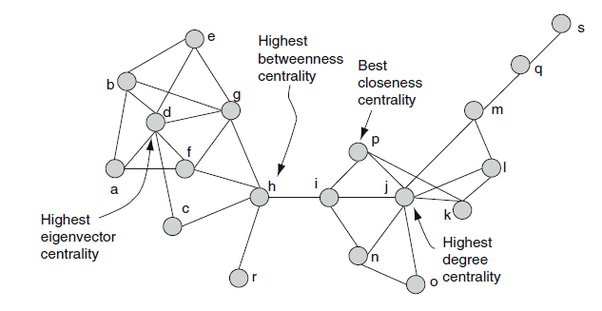 <br>

Let's now see what are the most important characters in The Witcher according to these centrality measures.

# The most important characters in The Witcher

### Degree Centrality

In [132]:
# This method will provide us with a scaled value between 0 and 1, measuring the degrees of centrality of a node.
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.7424242424242424,
 'Niedamir': 0.12121212121212122,
 'Eyck': 0.12121212121212122,
 'Dorregaray': 0.09090909090909091,
 'Yennefer': 0.21212121212121213,
 'Yarpen': 0.10606060606060606,
 'Gyllenstiern': 0.12121212121212122,
 'Boholt': 0.13636363636363635,
 'Kennet': 0.07575757575757576,
 'Crinfrid': 0.015151515151515152,
 'Villentretenmerth': 0.06060606060606061,
 'Istredd': 0.045454545454545456,
 'Herbolth': 0.030303030303030304,
 'Ivo': 0.015151515151515152,
 'Two': 0.06060606060606061,
 'Dandelion': 0.15151515151515152,
 'Pike': 0.030303030303030304,
 'Dainty': 0.10606060606060606,
 'Vespula': 0.045454545454545456,
 'Vimme': 0.07575757575757576,
 'Sulimir': 0.030303030303030304,
 'Ther': 0.015151515151515152,
 'Rhundurin': 0.015151515151515152,
 'Dudu': 0.045454545454545456,
 "Sh'eenaz": 0.06060606060606061,
 'Agloval': 0.09090909090909091,
 'Gaspard': 0.030303030303030304,
 'Teleri': 0.030303030303030304,
 'Dalia': 0.030303030303030304,
 'Mestvin': 0.030303030303030304,


In [133]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df

centrality
Geralt               0.742424
Niedamir             0.121212
Eyck                 0.121212
Dorregaray           0.090909
Yennefer             0.212121
Yarpen               0.106061
Gyllenstiern         0.121212
Boholt               0.136364
Kennet               0.075758
Crinfrid             0.015152
Villentretenmerth    0.060606
Istredd              0.045455
Herbolth             0.030303
Ivo                  0.015152
Two                  0.060606
Dandelion            0.151515
Pike                 0.030303
Dainty               0.106061
Vespula              0.045455
Vimme                0.075758
Sulimir              0.030303
Ther                 0.015152
Rhundurin            0.015152
Dudu                 0.045455
Sh'eenaz             0.060606
Agloval              0.090909
Gaspard              0.030303
Teleri               0.030303
Dalia                0.030303
Mestvin              0.030303
Essi                 0.136364
Gerard               0.030303
Zelest               0.060606
Duke                 0.030303
Akeretta             0.045455
Veverka              0.015152
Ethain               0.015152
Juan                 0.015152
Cynthia              0.030303
Braenn               0.090909
Ciri                 0.212121
Ervyll               0.075758
Voymir               0.030303
Kistrin              0.030303
Alvina               0.015152
Vesemir              0.045455
Cirilla              0.015152
Freixenet            0.030303
Venzlav              0.090909
Ekkehard             0.030303
Viraxas              0.045455
Morenn               0.030303
Mona                 0.015152
Pavetta              0.030303
Baron                0.030303
Junghans             0.030303
Brick                0.045455
Levecque             0.075758
Mousesack            0.030303
Yurga                0.090909
Visenna              0.030303
Atlan                0.015152
Lytta                0.015152
Gorazd               0.015152
Roach                0.030303
Nadbor               0.015152
Sulik                0.030303

<AxesSubplot: >

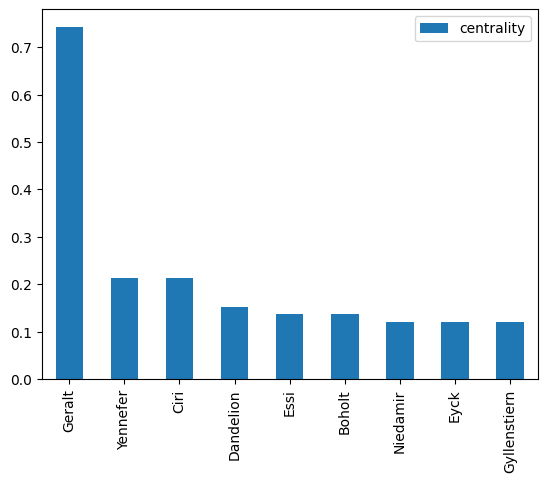

In [134]:
# Sorting all the values by centrality, from high to low and plotting a bar plot.
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

So now we can see that Geralt, Yennefer, Ciri and Dandelion are the 4 most important characters, and this matches what we saw in our graph earlier.

<AxesSubplot: >

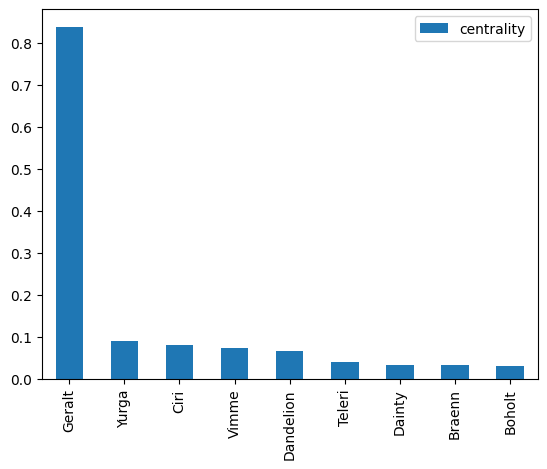

In [135]:
# Betweness Centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot: >

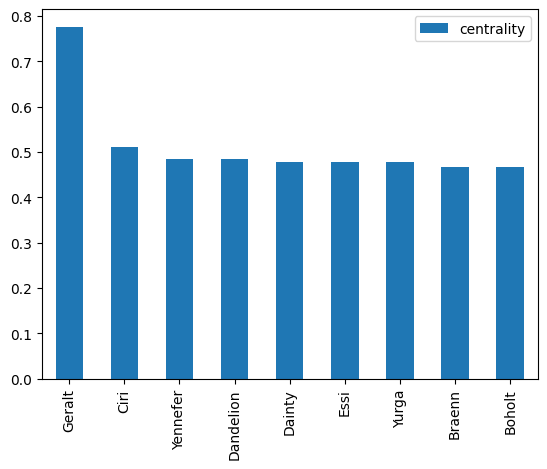

In [136]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [137]:
# Saving Centrality Measures into the node attributes. 
#nx.set_node_attributes(G, degree_dict, 'degree_centrality')
#nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
#nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

# Community Detection

Community Detection is a very useful technique in graph analytics. Basically, if we have a social network, we can identify the communities that form this graph. And from that, we can get a lot of different insights about the dynamics of the network and how different communities interact with each other. <br>

There are several algorithms available for community detection. For this, we'll use the __[Louvain](https://python-louvain.readthedocs.io/en/latest/api.html)__ detection algorithm. `community_louvain.best_partition(G)` gives us a dictionary of all the nodes and which community they belong to. 

In [138]:
!pip3 install python-louvain

You should consider upgrading via the 'D:\laptop data\sonakshi\Data Science Projects\witcher\path\to\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [139]:
import community.community_louvain as community_louvain

In [140]:
communities = community_louvain.best_partition(G)
communities

{'Geralt': 0,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 0,
 'Herbolth': 0,
 'Ivo': 0,
 'Two': 2,
 'Dandelion': 5,
 'Pike': 5,
 'Dainty': 5,
 'Vespula': 5,
 'Vimme': 5,
 'Sulimir': 5,
 'Ther': 5,
 'Rhundurin': 5,
 'Dudu': 5,
 "Sh'eenaz": 6,
 'Agloval': 6,
 'Gaspard': 4,
 'Teleri': 4,
 'Dalia': 4,
 'Mestvin': 4,
 'Essi': 6,
 'Gerard': 5,
 'Zelest': 6,
 'Duke': 6,
 'Akeretta': 6,
 'Veverka': 6,
 'Ethain': 0,
 'Juan': 0,
 'Cynthia': 6,
 'Braenn': 0,
 'Ciri': 3,
 'Ervyll': 3,
 'Voymir': 0,
 'Kistrin': 3,
 'Alvina': 3,
 'Vesemir': 0,
 'Cirilla': 0,
 'Freixenet': 3,
 'Venzlav': 3,
 'Ekkehard': 3,
 'Viraxas': 3,
 'Morenn': 3,
 'Mona': 0,
 'Pavetta': 3,
 'Baron': 3,
 'Junghans': 3,
 'Brick': 3,
 'Levecque': 3,
 'Mousesack': 3,
 'Yurga': 2,
 'Visenna': 0,
 'Atlan': 2,
 'Lytta': 0,
 'Gorazd': 0,
 'Roach': 2,
 'Nadbor': 2,
 'Sulik': 2}

Now, we'll set the comunities as a node attribute called `group` and this group attribute will basically be detected by pyvis, and automatically it will assign different colours for our nodes.

In [141]:
nx.set_node_attributes(G, communities, 'group')

In [142]:
# Visualizing the communities with pyvis
net = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
net.from_nx(G)
net.show("witcher_communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Characters' importance over time

Now let's analyze the evolution of characters' importance over time, throughout the book series. To do this, we need to create different graphs for all the different books and then we see what is the importance of characters in each of the books, and then we plot them on a graph. But, to be able to do that, we need to loop through all the books in our data and perform all the steps we have done so far. We'll have to create different functions for different steeps that we've done. We'll store all of these functions into a separate python file, so that we can import this python file into our notebook. So we'll create a `utils` folder in the `lib` folder, and there we'll create our `functions.py` file and `__init__.py` file (a file necessary for building a package in python).

In [144]:
from Lib.utils.functions import *

In [145]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [ ]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

C:\Users\sonakshi\AppData\Local\Temp\ipykernel_5024\4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\sonakshi\AppData\Local\Temp\ipykernel_5024\4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\sonakshi\AppData\

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()